In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("IRIS.csv") # reading the csv file

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.drop_duplicates() # no duplicate row

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df["sepal_length"].mean()

5.843333333333335

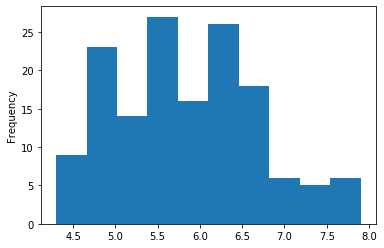

In [8]:
df["sepal_length"].plot.hist()

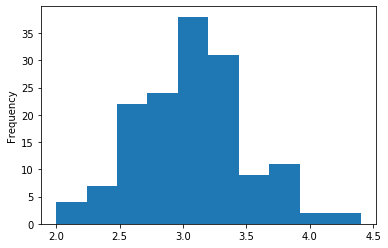

In [9]:
df["sepal_width"].plot.hist()

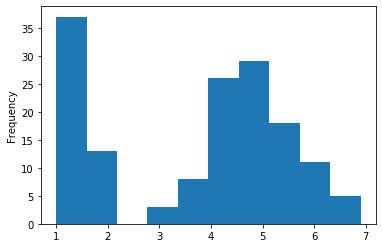

In [10]:
df["petal_length"].plot.hist()

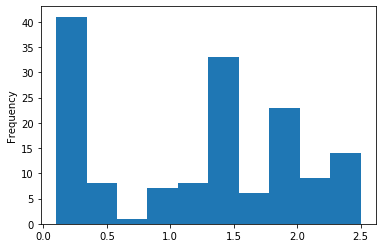

In [11]:
df["petal_width"].plot.hist()

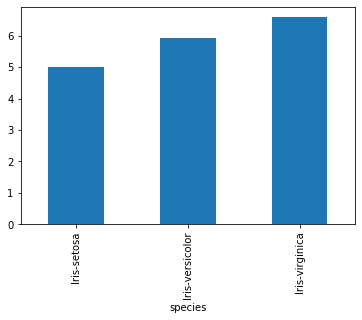

In [12]:
df.groupby("species")["sepal_length"].mean().plot.bar()

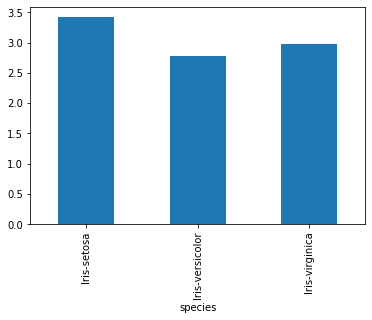

In [13]:
df.groupby("species")["sepal_width"].mean().plot.bar()

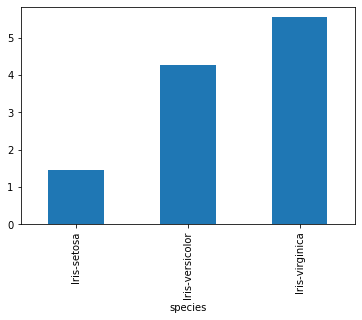

In [14]:
df.groupby("species")["petal_length"].mean().plot.bar()

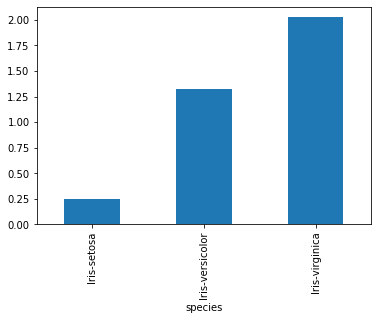

In [15]:
df.groupby("species")["petal_width"].mean().plot.bar()

In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

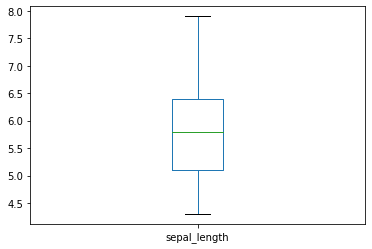

In [17]:
df[["sepal_length"]].plot.box() # plotting the boxplot to check the outliers

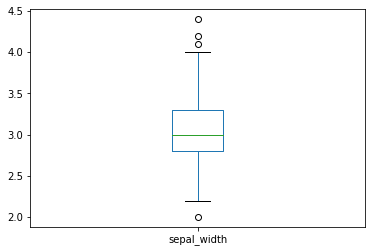

In [18]:
df["sepal_width"].plot.box()

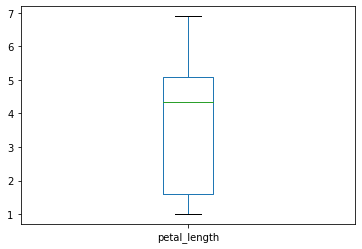

In [19]:
df[["petal_length"]].plot.box()

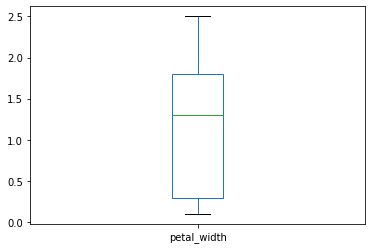

In [20]:
df[["petal_width"]].plot.box()

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
# seprating the target and the features
x=df.drop(["species"],axis=1)
y=df["species"]

# USING THE DECISIONTREECLASSIFIER

In [23]:
# splitting the test and the train data
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=42,stratify=y)

In [24]:
test_y.value_counts()/len(test_y)   # checking the distribution

Iris-virginica     0.342105
Iris-versicolor    0.342105
Iris-setosa        0.315789
Name: species, dtype: float64

In [25]:
train_y.value_counts()/len(train_y)

Iris-setosa        0.339286
Iris-virginica     0.330357
Iris-versicolor    0.330357
Name: species, dtype: float64

In [26]:
# importing and creating instance of decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=1)
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dt_model.score(train_x,train_y)

0.6696428571428571

In [28]:
dt_model.score(test_x,test_y)

0.6578947368421053

In [29]:
#finding out the test and train accuracy putting them in dataframe
train_acc=[]
test_acc=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(train_x,train_y)
    train_acc.append(dt_model.score(train_x,train_y))
    test_acc.append(dt_model.score(test_x,test_y))
frame=pd.DataFrame({"max_depth":range(1,10),"train_acc":train_acc,"test_acc":test_acc})
frame

,max_depth,train_acc,test_acc
0,1,0.669643,0.657895
1,2,0.964286,0.947368
2,3,0.982143,0.921053
3,4,0.991071,0.973684
4,5,0.991071,0.921053
5,6,1.000000,0.894737
6,7,1.000000,0.973684
7,8,1.000000,0.947368
8,9,1.000000,0.921053


Text(0, 0.5, 'accuracy score')

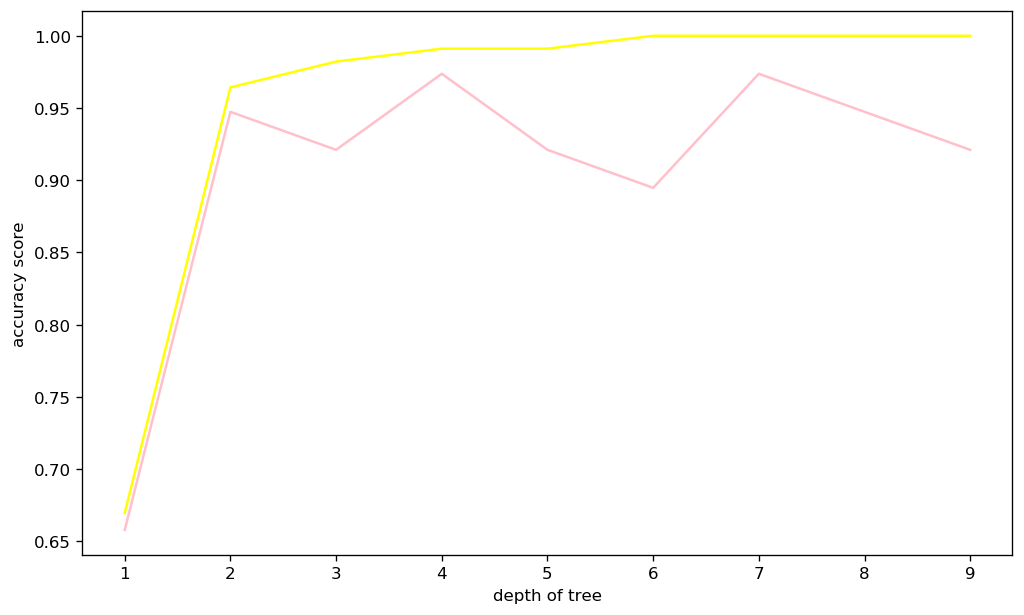

In [30]:
# plotting the plot to find the best fit model for the value of max_depth
plt.figure(figsize=[10,6] ,dpi=120)
plt.plot(frame["max_depth"],frame["train_acc"],color="yellow")
plt.plot(frame["max_depth"],frame["test_acc"],color="pink")
plt.xlabel("depth of tree")
plt.ylabel("accuracy score")

In [31]:
## after seeing the value of maxdepth the model underfits for max_depth=1 and the model overfits for max_depth>5

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=4)   # applying the best maxdepth
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
dt_model.score(train_x,train_y)   # checking the training score

0.9910714285714286

In [33]:
dt_model.score(test_x,test_y)      # checking the test score

0.9210526315789473